In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn as skl

from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

from sklearn.metrics import average_precision_score, mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import xgboost as xgb

from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

base_path = "d:/work/stackoverflow/"
base_path_nn = base_path + "exp/nn/"

Using TensorFlow backend.


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/device:GPU:0']

In [28]:
def data_divider(data, per=0.5, shuffle=True):
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    rr = round(len(data.index) * per)
    return data[:rr], data[rr:]

def get_norms(ser):
    return normalize(ser[:,np.newaxis], axis=0).ravel()

In [29]:
data = pd.read_csv(base_path + 'text.csv')
data = data[:10000]

data['title_overlap'] = get_norms(data['title_overlap'])
data['ans_count'] = get_norms(data['ans_count'])
data['questions_count'] = get_norms(data['questions_count'])
data['reached_people'] = get_norms(data['reached_people'])
#data['user_rating'] = get_norms(data['user_rating'])

data = data.drop(['id_post', 'id_user'], axis=1)

train_data, test_data = data_divider(data)
x_train = train_data.drop('post_type', axis=1)
y_train = train_data['post_type']
x_test = test_data.drop('post_type', axis=1)
y_test = test_data['post_type']

data[:5]

,ans_count,questions_count,reached_people,user_rating,debug_inf,title_overlap,post_type
0,0.000000,0.000695,3.625327e-06,19,0,0.010583,1
1,0.000000,0.000174,1.611256e-06,1,0,0.000000,0
2,0.000000,0.000087,5.572261e-07,1,0,0.009629,1
3,0.000081,0.000348,3.645467e-06,9,0,0.005835,1
4,0.000040,0.004780,7.586332e-04,725,0,0.010160,1


In [8]:
classifier = Sequential()

classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 15, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.4, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.3, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2, noise_shape=None, seed=None))

classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = SGD(momentum=0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

d:\programs\python3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=20, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  import sys
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
d:\programs\python3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: U

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                315       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                192       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                

d:\programs\python3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


6400/6400 [==============================] - 2s 265us/step - loss: 0.5198 - accuracy: 0.7842 - val_loss: 0.4937 - val_accuracy: 0.8044
Epoch 2/100
6400/6400 [==============================] - 2s 263us/step - loss: 0.5204 - accuracy: 0.7842 - val_loss: 0.4937 - val_accuracy: 0.8044
Epoch 3/100
6400/6400 [==============================] - 2s 248us/step - loss: 0.5201 - accuracy: 0.7842 - val_loss: 0.4935 - val_accuracy: 0.8044
Epoch 4/100
6400/6400 [==============================] - 2s 264us/step - loss: 0.5195 - accuracy: 0.7842 - val_loss: 0.4936 - val_accuracy: 0.8044
Epoch 5/100
6400/6400 [==============================] - 2s 253us/step - loss: 0.5198 - accuracy: 0.7842 - val_loss: 0.4934 - val_accuracy: 0.8044
Epoch 6/100
6400/6400 [==============================] - 2s 260us/step - loss: 0.5198 - accuracy: 0.7842 - val_loss: 0.4939 - val_accuracy: 0.8044
Epoch 7/100
6400/6400 [==============================] - 2s 264us/step - loss: 0.5199 - accuracy: 0.7842 - val_loss: 0.4938 - val_

6400/6400 [==============================] - 2s 236us/step - loss: 0.5202 - accuracy: 0.7842 - val_loss: 0.4938 - val_accuracy: 0.8044
Epoch 57/100
6400/6400 [==============================] - 2s 242us/step - loss: 0.5201 - accuracy: 0.7842 - val_loss: 0.4938 - val_accuracy: 0.8044
Epoch 58/100
6400/6400 [==============================] - 1s 234us/step - loss: 0.5197 - accuracy: 0.7842 - val_loss: 0.4934 - val_accuracy: 0.8044
Epoch 59/100
6400/6400 [==============================] - 2s 235us/step - loss: 0.5206 - accuracy: 0.7842 - val_loss: 0.4938 - val_accuracy: 0.8044
Epoch 60/100
6400/6400 [==============================] - 1s 234us/step - loss: 0.5193 - accuracy: 0.7842 - val_loss: 0.4934 - val_accuracy: 0.8044
Epoch 61/100
6400/6400 [==============================] - 2s 236us/step - loss: 0.5201 - accuracy: 0.7842 - val_loss: 0.4940 - val_accuracy: 0.8044
Epoch 62/100
6400/6400 [==============================] - 2s 235us/step - loss: 0.5195 - accuracy: 0.7842 - val_loss: 0.4937 

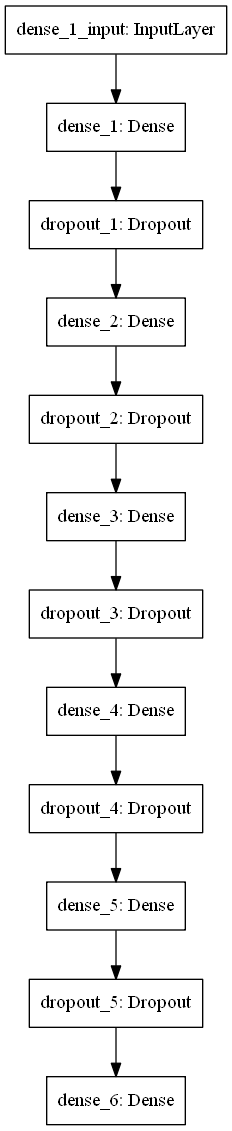

In [17]:
classifier.summary()

history = classifier.fit(x_train, y_train, validation_split=0.2, batch_size = 20, nb_epoch = 100)

prediction = classifier.predict(x_test).tolist()
plot_model(classifier, to_file="model.png")

In [19]:
def eval_res(res, goal):
    all_c = len(goal.index)
    right = 0
    for i in range(len(goal)):
        if res[i] == goal.iloc[i]:
            right += 1
    acc = right / all_c
    print('accuracy: {}'.format(acc))

    average_precision = average_precision_score(goal, res)
    f1_score = skl.metrics.f1_score(res, goal)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('F1 score: {}'.format(f1_score))

accuracy: 0.801
Average precision-recall score: 0.80
F1 score: 0.889505830094392
Train: 0.788, Test: 0.801


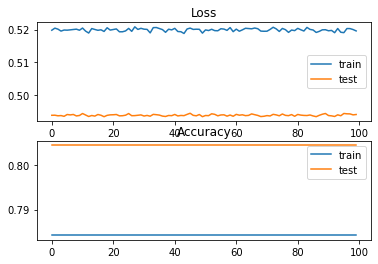

In [20]:
        
res = []
for i in prediction:
    if i[0] >= 0.5:
        res.append(1)
    else:
        res.append(0)

eval_res(res, y_test)
        

_, train_acc = classifier.evaluate(x_train, y_train, verbose=0)
_, test_acc = classifier.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

classifier.save("model_tmp.ser")

In [30]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train, y_train)
res = log_reg.predict(x_test).tolist()

eval_res(res, y_test)

accuracy: 0.788
Average precision-recall score: 0.79
F1 score: 0.8814317673378076


In [31]:
eval_res([1 for i in range(len(y_test))], y_test)

accuracy: 0.788
Average precision-recall score: 0.79
F1 score: 0.8814317673378076


In [32]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
res = model.predict(x_test)
eval_res(res, y_test)

accuracy: 0.788
Average precision-recall score: 0.81
F1 score: 0.8761392848796449
